<a href="https://colab.research.google.com/github/raulbenitez/conceptosclaros_ML/blob/master/Algoritmos_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de clasificación supervisada

## Procedimiento general

Partimos de una bsase de datos etiquetada, es decir de una matriz de datos $X$ de tamaño $n \times m$ donde n es el número de observaciones y m el número de variables o atributos. En problemas de naturaleza supervisada es preciso también disponer de un vector de etiquetas de clase $\omega_i, i=1\dots n$ que 
indique a la clase a la que pertenece cada una de las observaciones del conjunto de datos $X$. 

PAra entrenar un algoritmo de clasificación supervisada es preciso dividir el 
conjunto de datos y sus etiquetas en dos subconjuntos: 
- Un primer subconjunto que llamaremos de entrenamiento y qye servirá para diseñar/entrenar/ajustar el algoritmo. Este subconjunto suele construirse seleccionando aleatoriamente un $70\%$ de las $n$ observaciones. 

- El resto de observaciones se incuyen en un segundo subconjunto al que llamaremos conjunto de test o de validación y que servirá para determinar el rendimiento del clasificador. El rendimiento del clasificador se suele indicar en función del número de errores de clasificación, que en un problema con dos clases son ser del tipo falsa alarma u omisión.



Ejemplo: Cargemos el conjunto de datos iris y construyamos los subconjuntos de entrenamiento y validación:

In [7]:
from sklearn.datasets import load_iris
diris = load_iris()

Representemos los datos en forma de scatterplot multidimensional:

In [32]:
import pandas as pd
import seaborn as sns
import numpy as np

d = pd.DataFrame(diris.data,columns=diris.feature_names)
d['target'] = np.array(diris.target)
d.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


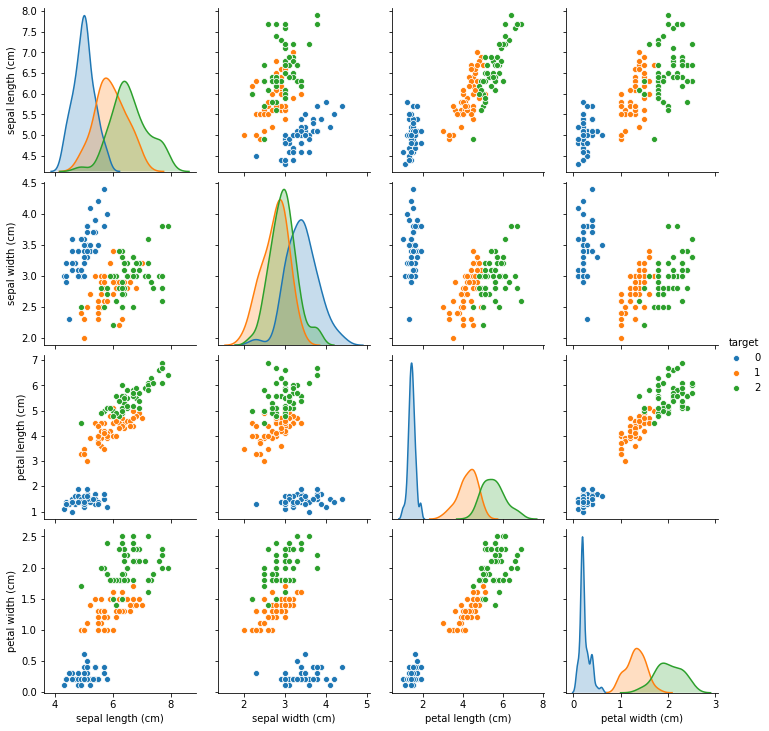

In [34]:
sns.pairplot(d,hue='target')

In [12]:
X = diris.data # matriz de datos 
y = diris.target    # vector de etiquetas de clase 

print('Hay {} observaciones y {} variables'.format(X.shape[0],X.shape[1]))
print('El vector de etiquetas de clase tiene {} componentes'.format(y.shape[0]))

Hay 150 observaciones y 4 variables
El vector de etiquetas de clase tiene 150 componentes


Dividamos el dataset en los subconjuntos de entrenamiento y test. La variable test_size indica la fracción de datos que guardamos para el test. 

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('Número de observaciones del conjunto de entrenamiento es {}'.format(X_train.shape[0]))
print('Número de observaciones del conjunto de test es {}'.format(X_test.shape[0]))

Número de observaciones del conjunto de entrenamiento es 100
Número de observaciones del conjunto de test es 50


Ahora viene cuando sacamos la batería de algoritmos de clasificación supervisada. Cada uno responde a una idea de naturaleza algebraica, geométrica, estadística o informática. En toda la sesión utilizaremos las librerías de reconocimiento de patrones, inteligencia artificial y machine learning scikit-learn: https://scikit-learn.org/stable/

## Algoritmo KNN (k nearest neighbours, k Vecinos más cercanos)

Entrenamos el modelo

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Si queremos predecir la clase a la que pertenece la primera observación del conjunto de test, haremos:

In [54]:
xnew = X_test[0].reshape(1,-1)
true_label = y_test[0]
predicted_label = knn.predict(xnew)
print('Observación a predecir es {}'.format(*xnew))
print('la clase real a la que pertenece es {}'.format(true_label))
print('la clase que predice el algoritmo KNN que hemos entrenado es {}'.format(predicted_label))

Observación a predecir es [6.1 2.8 4.7 1.2]
la clase real a la que pertenece es 1
la clase que predice el algoritmo KNN que hemos entrenado es [1]


Ahora procedemos a ver cómo se comporta el clasificador con todos los datos del conjunto de test:

In [57]:
from sklearn.metrics import confusion_matrix

y_knn_pred = knn.predict(X_test)
confusion_matrix(y_test, y_knn_pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])

## Naive Bayes:

In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

gnb = GaussianNB()
y_NB_pred = gnb.fit(X_train, y_train).predict(X_test)

confusion_matrix(y_test, y_NB_pred)

array([[19,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 15]])

Árbol de decisión (Decision trees):

In [62]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)

Representar gráficamente el árbol de decisión:

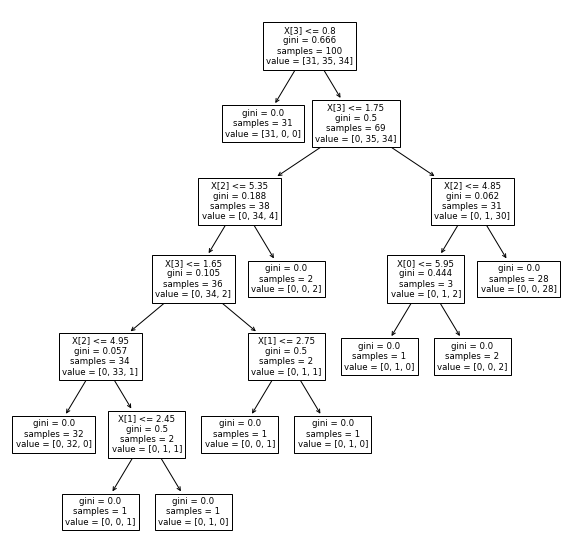

In [63]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
ax = plot_tree(dt) 
plt.show()

Validar el rendimiento con el conjunto de test:

In [65]:
y_DT_pred = dt.predict(X_test)

confusion_matrix(y_test, y_DT_pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])

Los tres algoritmos funcionan igual de bien! El motivo es que el dataset de iris es fácil de clasificar. Probemos con un problema algo más complicado. 

### Ejercicio: Aplicar los algoritmos de clasificación KNN, Naive Bayes y Decision trees a la base de datos mtcars con el objetivo de predecir el origen del coche utilizando únicamente los atributos numéricos y eliminando las observaciones que tengan datos incompletos.


In [69]:
import pandas as pd 
import seaborn as sns 
mpg = sns.load_dataset("mpg")
mpg_nonans = mpg.dropna() # remove observations with NaNs

mpg_num = mpg_nonans.select_dtypes(include='number') # keep only numeric variables 

print('datos originales = {}'.format(mpg.shape))
print('datos numericos sin NaNs = {}'.format(mpg_nonans.shape))
print('datos numericos = {}'.format(mpg_num.shape))


datos originales = (398, 9)
datos numericos sin NaNs = (392, 9)
datos numericos = (392, 7)


In [70]:
mpg_nonans.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [71]:
X = mpg_num
y = mpg_nonans['origin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [73]:
X_train.shape

(262, 7)

In [79]:
knn = KNeighborsClassifier(n_neighbors=3)
y_knn_pred = knn.fit(X_train, y_train).predict(X_test)
CM_KNN = confusion_matrix(y_test, y_knn_pred)
print('CONFUSION MATRIX KNN: \n {} '.format(CM_KNN))

gnb = GaussianNB()
y_NB_pred = gnb.fit(X_train, y_train).predict(X_test)
CM_NB = confusion_matrix(y_test, y_NB_pred)
print('CONFUSION MATRIX NB: \n {}'.format(CM_NB))


dt = tree.DecisionTreeClassifier()
y_DT_pred = dt.fit(X_train,y_train).predict(X_test)
CM_DT = confusion_matrix(y_test, y_DT_pred)

print('CONFUSION MATRIX DT: \n {}'.format(CM_DT))


CONFUSION MATRIX KNN: 
 [[ 9 12  9]
 [ 4 13  8]
 [ 2  8 65]] 
CONFUSION MATRIX NB: 
 [[12 15  3]
 [ 5 18  2]
 [14  7 54]]
CONFUSION MATRIX DT: 
 [[20  7  3]
 [ 4 16  5]
 [ 5  3 67]]
